### Evaluation experiments

- Positional Spearman's p Correlation Coefficient: Order of shared words could indicate semantic 

In [1]:
import pandas as pd

from slt_positional_bias.dataset import generate_merged_data_frame, sort_data_frame, store_df_as_parquet, load_parquet_as_df, normalize_and_tokenize, jaccard, spearman_word_order_correlation
from scipy.stats import spearmanr

df_name = "LLM-alias-fast-sample-count-20-1-2025-07-27 21h-08m-09s"
df = load_parquet_as_df(df_name)
# df

2025-07-27 22:07:01.679 | INFO     | slt_positional_bias.config:<module>:11 - PROJ_ROOT path is: C:\Users\Albert\Documents\SLT\slt_group_2_positional_bias
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Albert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df[['Spearman correlation coefficient', 'Spearman p-value']] = df.apply(
    lambda row: pd.Series(spearman_word_order_correlation(row['oracle'], row['answer'])),
    axis=1
)

df

,topic_id,topic,rel_3_doc_position,nr_rel_3_doc,nr_rel_0_doc,oracle,answer,Spearman's p correlation coefficient,Spearman's p-value,Spearman correlation coefficient,Spearman p-value
0,2024-127266,what are some key challenges related to the re...,0,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.591228,7.676473e-03,0.591228,7.676473e-03
1,2024-127266,what are some key challenges related to the re...,4,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.699812,5.030416e-07,0.699812,5.030416e-07
2,2024-127266,what are some key challenges related to the re...,9,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.386997,1.126113e-01,0.386997,1.126113e-01
3,2024-127266,what are some key challenges related to the re...,14,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.674487,2.304133e-05,0.674487,2.304133e-05
4,2024-127266,what are some key challenges related to the re...,19,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.613675,8.554003e-04,0.613675,8.554003e-04
...,...,...,...,...,...,...,...,...,...,...,...
195,2024-96063,how using maps can impact your pedagogy,0,1,19,maps and map learning play a critical role in ...,Using maps can significantly impact your pedag...,0.448968,3.661452e-03,0.448968,3.661452e-03
196,2024-96063,how using maps can impact your pedagogy,4,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.286763,1.244406e-01,0.286763,1.244406e-01
197,2024-96063,how using maps can impact your pedagogy,9,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.265826,1.227205e-01,0.265826,1.227205e-01
198,2024-96063,how using maps can impact your pedagogy,14,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.443239,8.654186e-03,0.443239,8.654186e-03


In [29]:
df_spearman = df.groupby('rel_3_doc_position')[['Spearman correlation coefficient', 'Spearman p-value']].mean().reset_index()
df_spearman.columns = ['Position of oracle document', 'Spearman correlation coefficient', 'Spearman p-value']
df_spearman['Position of oracle document'] = df_spearman['Position of oracle document'] + 1

df_spearman

store_df_as_parquet(df_spearman, f"spearman-{df_name}")


2025-07-27 23:04:33.670 | INFO     | slt_positional_bias.dataset:store_df_as_parquet:134 - Data frame saved to C:\Users\Albert\Documents\SLT\slt_group_2_positional_bias\data\processed\spearman-LLM-alias-fast-sample-count-20-1-2025-07-27 21h-08m-09s-1-2025-07-27 23h-04m-33s.parquet


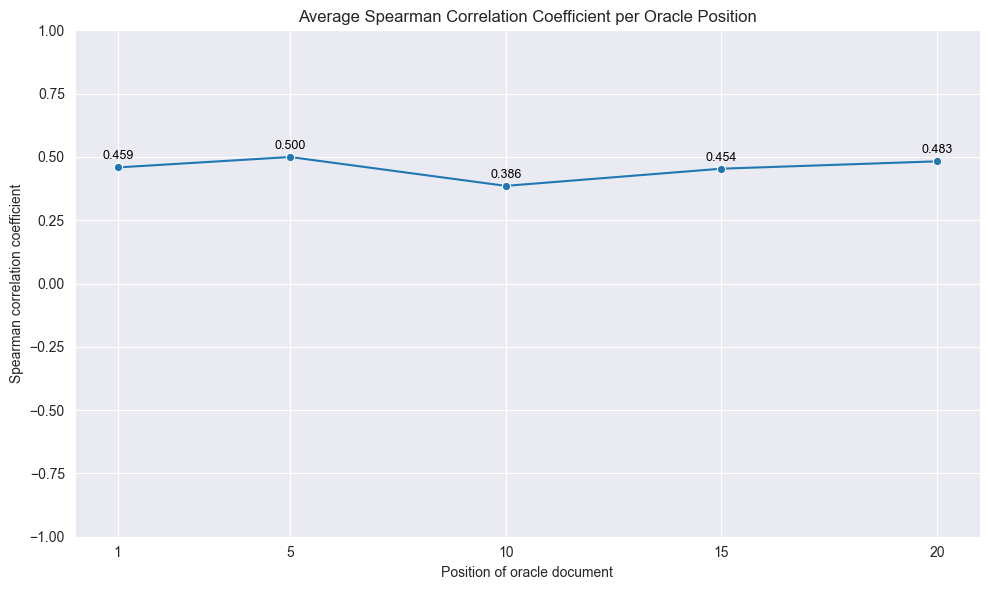

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from slt_positional_bias.plots import savefig

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_spearman,
    x='Position of oracle document',
    y='Spearman correlation coefficient',
    marker='o'
)

plt.xticks(df_spearman['Position of oracle document'])

title = 'Average Spearman Correlation Coefficient per Oracle Position'

plt.title(title)
plt.xlabel('Position of oracle document')
plt.ylabel('Spearman correlation coefficient')
plt.xlim(0, 21)
plt.ylim(-1, 1)
plt.grid(True)
plt.tight_layout()

for x, y in zip(df_spearman['Position of oracle document'], df_spearman['Spearman correlation coefficient']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontsize=9, color='black')

savefig(plt, title, df_name, 300)


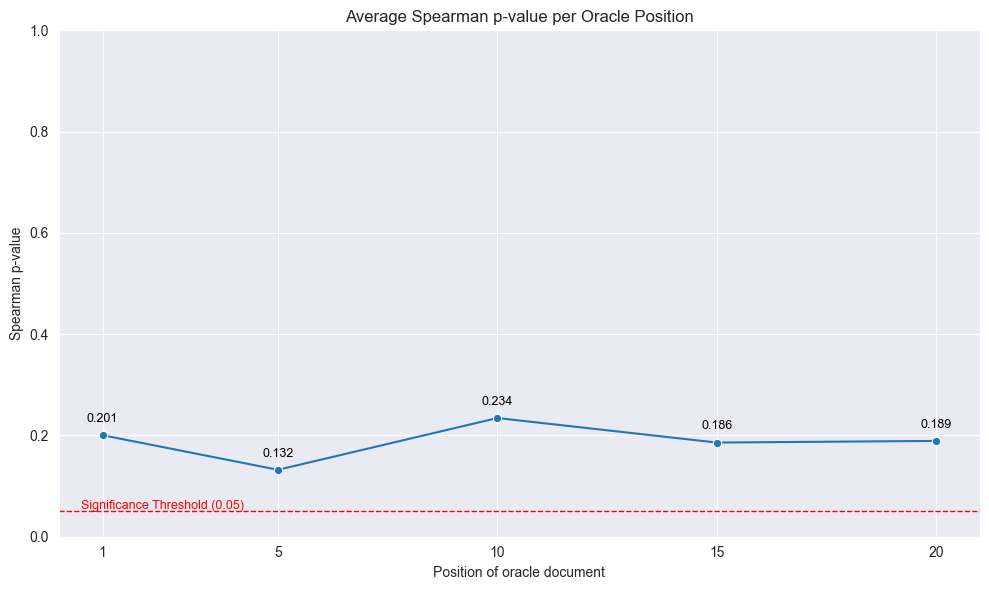

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_spearman,
    x='Position of oracle document',
    y='Spearman p-value',
    marker='o'
)

plt.xticks(df_spearman['Position of oracle document'])

title = 'Average Spearman p-value per Oracle Position'

plt.title(title)
plt.xlabel('Position of oracle document')
plt.ylabel('Spearman p-value')
plt.xlim(0, 21)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()

for x, y in zip(df_spearman['Position of oracle document'], df_spearman['Spearman p-value']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontsize=9, color='black')
plt.axhline(0.05, color='red', linestyle='--', linewidth=1)
plt.text(0.5, 0.055, 'Significance Threshold (0.05)', color='red', fontsize=9)


savefig(plt, title, df_name, 300)

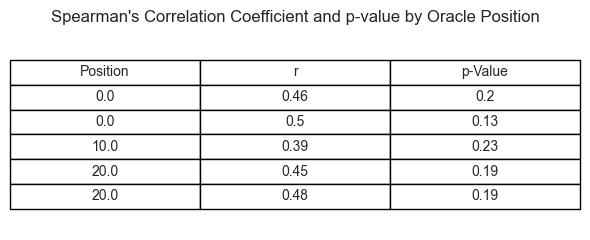

In [27]:
import matplotlib.pyplot as plt

# Data to show
cols = ['Position', 'r', 'p-Value']
cell_data = df_spearman.values.tolist()

# Create plot
fig, ax = plt.subplots(figsize=(6, len(df_spearman)*0.5))
ax.axis('off')  # Hide plot axes

# Create table
table = ax.table(
    cellText=cell_data,
    colLabels=cols,
    cellLoc='center',
    loc='center'
)

df_spearman['Position of oracle document'] = df_spearman['Position of oracle document'].astype(int)
df_spearman['Spearman correlation coefficient'] = df_spearman['Spearman correlation coefficient'].round(2)
df_spearman['Spearman p-value'] = df_spearman['Spearman p-value'].round(2)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust cell spacing

title = "Spearman's Correlation Coefficient and p-value by Oracle Position"

plt.title(title, fontsize=12, pad=12)
plt.tight_layout()

savefig(plt, title, df_name, 300)

In [30]:
df_jaccard = load_parquet_as_df("jaccard-LLM-alias-fast-sample-count-20-1-2025-07-27 21h-08m-09s-1-2025-07-27 23h-03m-10s")
df_jaccard

,Position of oracle document,Jaccard coefficient
0,1,0.209844
1,5,0.201002
2,10,0.191677
3,15,0.191017
4,20,0.180400


In [31]:
df_jaccard_spearman = pd.merge(df_jaccard, df_spearman, on='Position of oracle document', how='inner')
df_jaccard_spearman

,Position of oracle document,Jaccard coefficient,Spearman correlation coefficient,Spearman p-value
0,1,0.209844,0.458724,0.200516
1,5,0.201002,0.499937,0.132164
2,10,0.191677,0.385917,0.234437
3,15,0.191017,0.453739,0.185978
4,20,0.180400,0.482800,0.189248


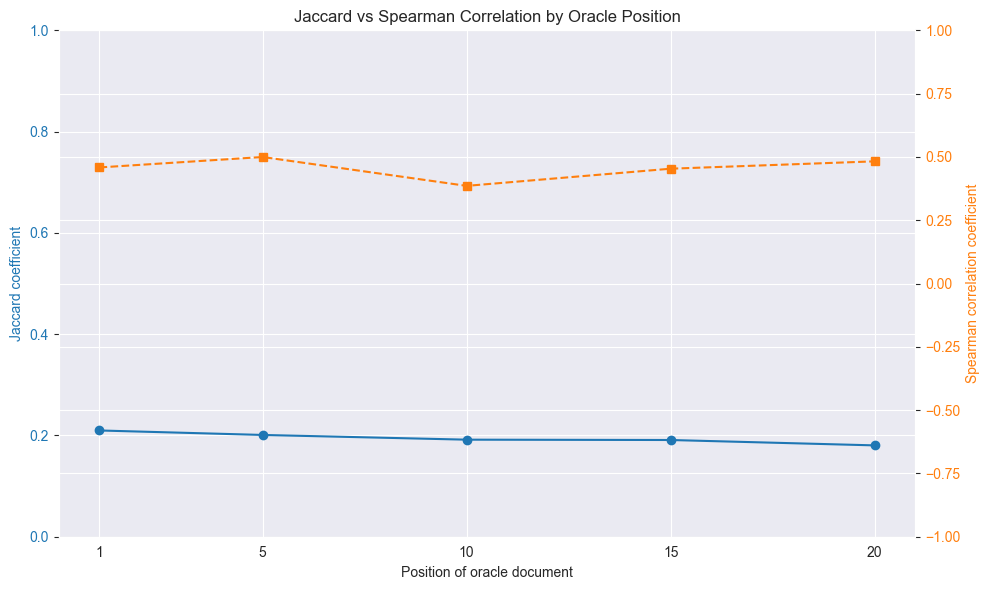

In [39]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Jaccard line
color1 = 'tab:blue'
ax1.set_xlabel('Position of oracle document')
ax1.set_ylabel('Jaccard coefficient', color=color1)
ax1.plot(df_jaccard_spearman['Position of oracle document'], df_jaccard_spearman['Jaccard coefficient'],
         color=color1, marker='o', label='Jaccard')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1)

# Spearman line (second y-axis)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel("Spearman correlation coefficient", color=color2)
ax2.plot(df_jaccard_spearman['Position of oracle document'], df_jaccard_spearman["Spearman correlation coefficient"],
         color=color2, marker='s', linestyle='--', label='Spearman')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(-1, 1)

title = "Jaccard vs Spearman Correlation by Oracle Position"

plt.title(title)
plt.xlim(0, 21)
plt.grid(True)
plt.xticks(df_jaccard_spearman['Position of oracle document'])
fig.tight_layout()

savefig(plt, title, df_name, 300)